# DB Scan
- 비지도학습 시 이상치 데이터를 찾을 수 있다
- 입출금 (금액/위치)의 이상치 감지

In [21]:
# data\out_visit.csv 파일을 읽어와서 DB Scan을 이용해 군집화 수행하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/out_visit.csv')
df.head()

,Unnamed: 0,monthly_spend,visit_count
0,0,224.835708,8.715575
1,1,193.086785,9.121569
2,2,232.384427,10.166102
3,3,276.151493,10.107604
4,4,188.292331,5.244661


In [22]:
# 첫 컬럼 제거
df = df.drop(columns=df.columns[0])
df.head()

,monthly_spend,visit_count
0,224.835708,8.715575
1,193.086785,9.121569
2,232.384427,10.166102
3,276.151493,10.107604
4,188.292331,5.244661


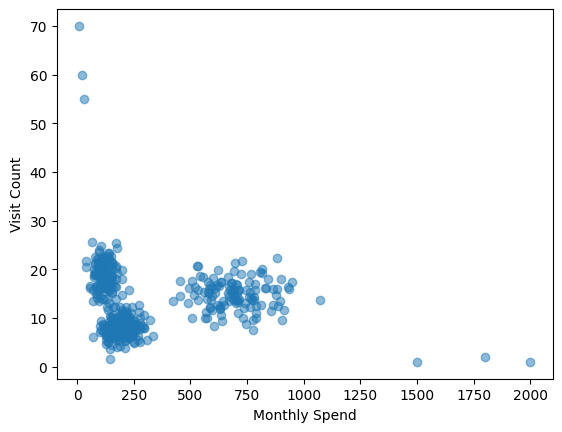

In [23]:
# 시각화 진행
plt.scatter(df['monthly_spend'], df['visit_count'], alpha=0.5)
plt.xlabel('Monthly Spend')
plt.ylabel('Visit Count')
plt.show()

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위한 스케일러 임포트
# DBSCAN은 밀도 기반 군집화 알고리즘으로, eps와 min_samples 파라미터를 조정하여 군집을 형성합니다.
# DB Scan은 scaler를 무조건 진행해야 한다
# eps: 군집의 최대 거리, min_samples: 군집을 형성하기 위한 최소 샘플 수
# eps와 min_samples는 데이터의 특성에 따라 조정해야 하며, 일반적으로 eps는 데이터의 평균 거리나 분포를 고려하여 설정하고, min_samples는 군집의 크기에 따라 조정합니다.
# DBSCAN은 이상치(노이즈)를 -1로 표시하므로, 군집화 결과를 분석할 때 이를 고려해야 합니다.
# DBSCAN은 군집의 모양이 불규칙한 경우에도 잘 작동하며, K-Means와 달리 군집의 수를 사전에 지정할 필요가 없습니다.
# DBSCAN은 밀도가 높은 영역을 군집으로 인식하므로, 데이터의 밀도에 따라 군집이 형성됩니다. 따라서 eps와 min_samples를 적절히 조정하여 원하는 군집 결과를 얻을 수 있습니다. 
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['monthly_spend', 'visit_count']])
# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.5, min_samples=3)
df['Cluster'] = dbscan.fit_predict(X_scaled)

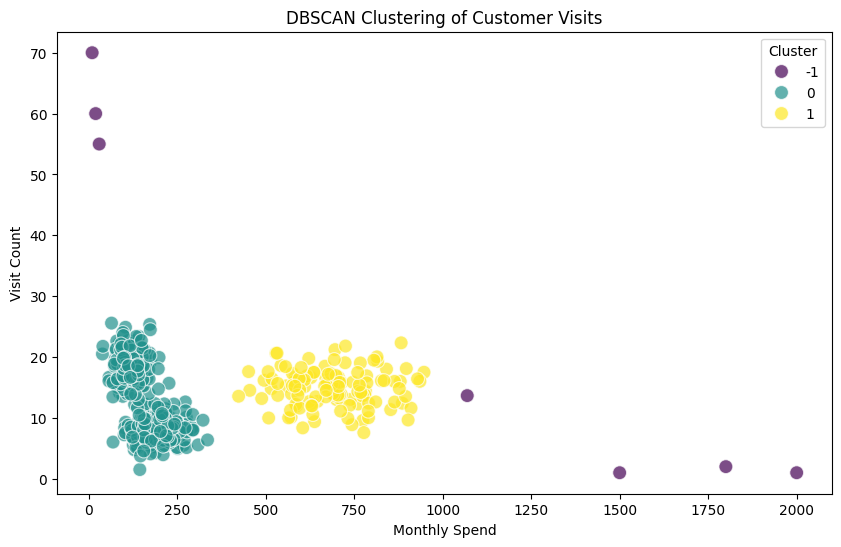

In [41]:
# 시각화
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='monthly_spend', y='visit_count', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering of Customer Visits')
plt.xlabel('Monthly Spend')
plt.ylabel('Visit Count')
plt.legend(title='Cluster')
plt.show()


In [42]:
# 군집별 고객 수 확인
print(df['Cluster'].value_counts())

Cluster
 0    340
 1    119
-1      7
Name: count, dtype: int64
